# ECE 462 - Homework #4

## Problem 3.1.1

Prove $F\{x(t)e^{i\omega_0t}\}=X(\omega+\omega_0)$

To begin, the Fourier transform is as follows:

$$F(\omega)=\mathscr{F}\{f(t)\}=\int_{-\infty}^{\infty}f(t)e^{i\omega t}dt$$

Now replace $f(t)$ with $f(t)e^{i\omega_0t}$:

$$F(\omega)=\mathscr{F}\{f(t)e^{i\omega_0t}\}=\int_{-\infty}^{\infty}f(t)e^{i\omega t}e^{i\omega_0t}dt$$

Which simplifies to:

$$F(\omega)=\mathscr{F}\{f(t)e^{i\omega_0t}\}=\int_{-\infty}^{\infty}f(t)e^{i(\omega+\omega_0) t}dt$$

Thus, the original Fourier transform can be applied:

$$\mathscr{F}\{f(t)e^{i\omega_0t}\}=F(\omega+\omega_0)$$

## Problem 3.1.3

$$\lim_{\alpha \to 0}\frac{2\alpha}{\alpha^2+(\omega-\omega^2)^2}=2\pi \delta(\omega-\omega_0)$$

To begin, take the left-hand of the equation into the time-domain:

$$\mathscr{F}^{-1}\{\frac{2\alpha}{\alpha^2+(\omega-\omega^2)^2}\}=e^{-\alpha|t|}e^{-i\omega_0t}$$

$$\lim_{\alpha \to 0}(e^{-\alpha|t|}e^{-i\omega_0t})=e^{-i\omega_0t}$$

This results in the left-hand side being: $e^{-i\omega_0t}$. The Fourier transform of this proves the initial equation:

$$\mathscr{F}\{e^{-i\omega_0t}\}=2\pi \delta(\omega-\omega_0)=\lim_{\alpha \to 0}\frac{2\alpha}{\alpha^2+(\omega-\omega^2)^2}$$

## Problem 3.1.5

$$\mathscr{F}\{\Psi (x)\}=e^{\frac{-\alpha^2(k-k_0)^2}{2}}$$

## Problem 3.2.1

$$DOS=\sum_{n=1}^{\infty}\delta(E-n^2)$$



## Problem 3.4.1

The particle is transmitted through the barrier in functions of the eigenstates. We can plainly see there are periodic dips in what energies are transferred through the dual-potential well. 

## Problem 3.4.2

We could instead solve these types of problems by sending in a large range of input energy states and measuring the output. On the other hand, we could also send the equivalent of an _impulse_ response - but I am not sure what the quantum equivalent of this would be. 

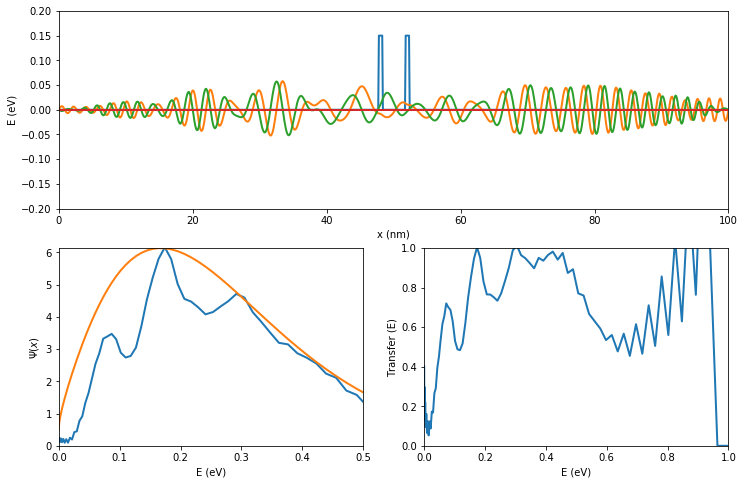

In [2]:
""" Se3_1.py
This program calculates the 
transmission through a barrier. """

from math import pi,sqrt, exp, cos, sin
import numpy as np
from matplotlib import pyplot as plt
from numba import jit

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

NN = 1000
N2 = int(NN/2)
hbar = 1.054e-34
m0 = 9.1e-31
melec = m0
meff = 1.0
ecoul = 1.6e-19
epsz = 8.85e-9
eV2J = 1.6e-19
J2eV = 1/eV2J

del_x = 0.1e-9
dt = .5e-16
ra = (0.5*hbar/m0)*(dt/del_x**2)
rd = dt/hbar
DX = del_x*1e9  
XX = np.linspace(DX,DX*NN,NN)

del_K = 1/(del_x*NN)
KK = np.linspace(0,del_K*(NN-1),NN)
EE = np.zeros(NN)
EE[0] = 0
for n in range(1,NN):
    EE[n] = (J2eV/(2*melec))*(hbar**2)*(2*pi*KK[n])**2


# ------------ Specify the potential ---------------

V = np.zeros(NN)
# V[N2-2:N2+3] = .2*eV2J
V[N2-23:N2-17] = 0.15 * eV2J
V[N2+17:N2+23] = 0.15 * eV2J


# ------------ Initialize psi ----------------------

lambda_ = 3e-9/del_x
sigma   = 15
nc = int(4*NN/10) # Starting position

prl = np.zeros(NN)
pim = np.zeros(NN)
for n in range(NN):
    prl[n] = np.exp(-1.*((n-nc)/sigma)**2)*np.cos(2*pi*(n-nc)/lambda_)
    pim[n] = np.exp(-1.*(((n-nc)/sigma)**2))*np.sin(2*pi*(n-nc)/lambda_)
  
ptot = np.sum(prl**2 + pim**2)
pnorm = sqrt(ptot)
prl = np.divide(prl,pnorm)
pim = np.divide(pim,pnorm)

psi = prl + pim*1j 
PF0 = np.fft.fft(psi)  # FFT of the input

@jit
def fdtd(prl, pim, n_step):
#     print("FDTD: nstep = ",n_step)
    for _ in range(n_step):

        for n in range(NN-1):
            prl[n] = prl[n] - ra*(pim[n-1] - 2*pim[n] + pim[n+1])+rd*V[n]*pim[n]

        for n in range(NN-1): 
            pim[n] = pim[n] + ra*(prl[n-1] - 2*prl[n] + prl[n+1])-rd*V[n]*prl[n]

T = 0

# ---------- The core FDTD loop ----------------------
import matplotlib.animation as animation

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.set_xlim(0, NN * DX)
ax1.set_ylim(-0.2, 0.2)
ax1.set_xlabel("x (nm)")
ax1.set_ylabel("E (eV)")
line1_1, = ax1.plot([], [], lw=2)
line1_2, = ax1.plot([], [], lw=2)
line1_3, = ax1.plot([], [], lw=2)
line1_4, = ax1.plot([], [], lw=2)

ax2 = fig.add_subplot(223)
ax2.set_xlim(0, 0.5)
ax2.set_ylim(0, max(abs(PF0)))
ax2.set_xlabel("E (eV)")
ax2.set_ylabel("$\Psi(x)$")
line2_1, = ax2.plot([], [], lw=2)
line2_2, = ax2.plot([], [], lw=2)

ax3 = fig.add_subplot(224)
ax3.set_xlim(0, 1.0)
ax3.set_ylim(0, 1)
ax3.set_xlabel("E (eV)")
ax3.set_ylabel("Transfer (E)")
line3_1, = ax3.plot([], [], lw=2)

lines = [line1_1, line1_2, line1_3, line1_4, line2_1, line2_2, line3_1]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    fdtd(prl, pim, i)
    psi = prl + pim * 1j
    psi[0:N2] = 0
    PF = np.fft.fft(psi)
    trans = np.zeros(NN)
    for n in range(NN):
        if abs(PF0[n]) > 0.05:
            trans[n] = abs(PF[n]/PF0[n])
    
    y1_1 = V * J2eV
    y1_2 = prl
    y1_3 = pim
    y1_4 = V
    y2_1 = abs(PF)
    y2_2 = abs(PF0)
    y3_1 = trans
    
    x_list = [XX, XX, XX, XX, EE, EE, EE]
    y_list = [y1_1, y1_2, y1_3, y1_4, y2_1, y2_2, y3_1]
    
    for lnum, line in enumerate(lines):
        line.set_data(x_list[lnum], y_list[lnum])
        
    return lines
    
from IPython.display import HTML
rcParams['animation.html']= 'html5'
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=75, interval=70, blit=True)
HTML(anim.to_html5_video())